<div style="float:left;font-size:20px;">
    <h1>Profiling</h1>
</div><div style="float:right;"><img src="../assets/banner.jpg"></div>

In [17]:
import cProfile
import pstats
import numpy as np

In [22]:
def get_random_normals():
    return np.random.normal(0, 1, 10000)

def add_one(x):
    return x + 1

def square(x):
    return x * x

def long_calculation():
    """A very inefficient algorithm for computing (x + 1)^2 for a set of random numbers"""
    xs = get_random_normals().tolist()  # Convert to a less efficient list format
    result = []
    for x in xs:  # Perform an inefficient loop
        res = square(add_one(x))
        result.append(x)
    return result

## Profiling

In [24]:
pr = cProfile.Profile()
pr.enable()

x = long_calculation()

pr.disable()
ps = pstats.Stats(pr).sort_stats('cumulative')

# Save stats to a dmp file for analysis
ps.dump_stats('C:/Temp/profile.dmp')

In [25]:
# Print dump to console
ps.print_stats()

         30051 function calls in 0.009 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.000    0.000    0.009    0.004 C:\Users\Mark\.conda\envs\CatAna\lib\site-packages\IPython\core\interactiveshell.py:3288(run_code)
        2    0.000    0.000    0.009    0.004 {built-in method builtins.exec}
        1    0.000    0.000    0.009    0.009 <ipython-input-24-aedbeb7be85a>:4(<module>)
        1    0.005    0.005    0.009    0.009 <ipython-input-22-e4e0d8fa5287>:10(long_calculation)
    10000    0.001    0.000    0.001    0.000 <ipython-input-22-e4e0d8fa5287>:4(add_one)
    10000    0.001    0.000    0.001    0.000 <ipython-input-22-e4e0d8fa5287>:7(square)
    10000    0.001    0.000    0.001    0.000 {method 'append' of 'list' objects}
        1    0.000    0.000    0.000    0.000 <ipython-input-22-e4e0d8fa5287>:1(get_random_normals)
        1    0.000    0.000    0.000    0.000 {method 'normal' of 'numpy.rand

## Analysis of .dmp file

A dmp file can be analysed interactively with `snakeviz` which provide a bokeh dashboard to perform deepdives into the profile dump.

Install `snakeviz` with:
```cmd
pip install snakeviz
```

A profile dump  can then be analysed with:
```cmd
snakeviz C:/Temp/profile.dmp
```

The result of the profile for the dummy code is presented below.

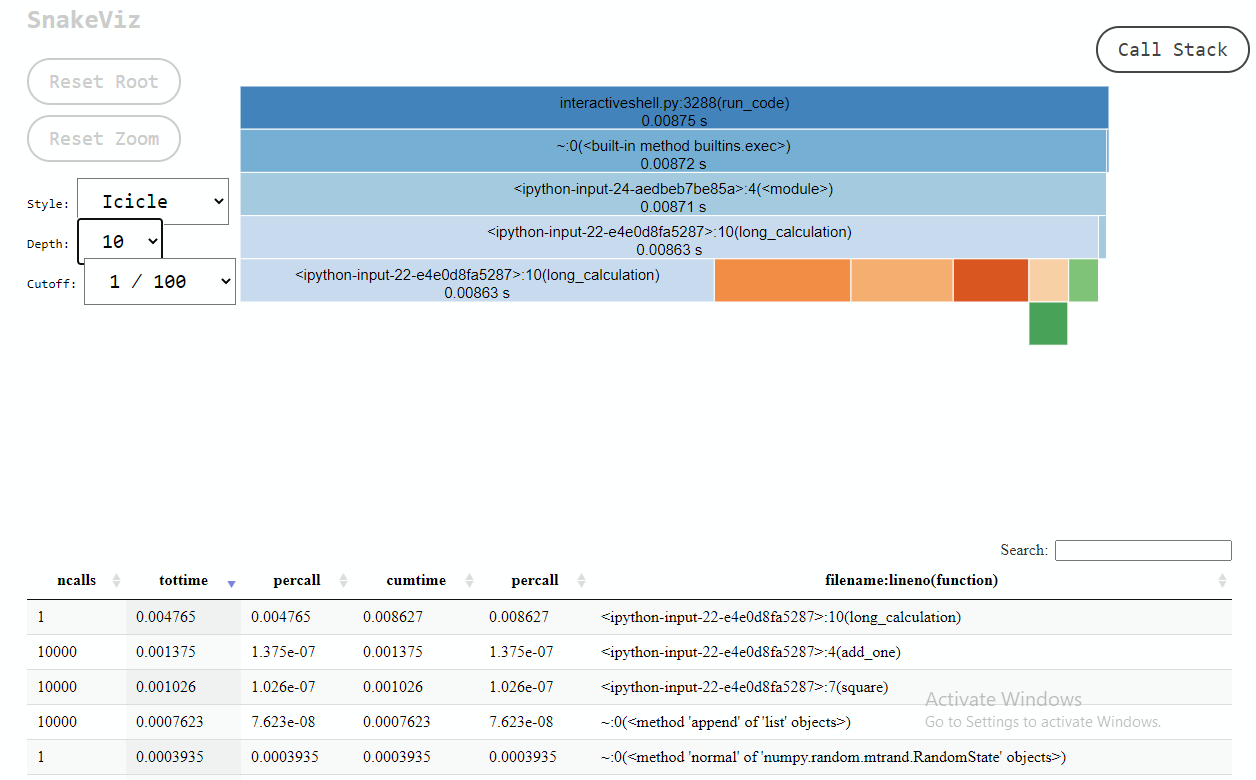

In [41]:
def long_calculation_opt():
    """A very inefficient algorithm for computing (x + 1)^2 for a set of random numbers"""
    xs = get_random_normals()  # Keep as a more efficient nd.array format
    result = xs + 1
    result = result * result
    return result

In [42]:
pr = cProfile.Profile()
pr.enable()
x = long_calculation_opt()
pr.disable()
ps = pstats.Stats(pr).sort_stats('cumulative')

# Save stats to a dmp file for analysis
ps.dump_stats('C:/Temp/profile_2.dmp')

## Line profiler

In [45]:
%load_ext line_profiler

In [49]:
%lprun -f long_calculation long_calculation()

Timer unit: 1e-07 s

Total time: 0.0212987 s
File: <ipython-input-22-e4e0d8fa5287>
Function: long_calculation at line 10

Line #      Hits         Time  Per Hit   % Time  Line Contents
    10                                           def long_calculation():
    11                                               """A very inefficient algorithm for computing (x + 1)^2 for a set of random numbers"""
    12         1       5047.0   5047.0      2.4      xs = get_random_normals().tolist()  # Convert to a less efficient list format
    13         1          8.0      8.0      0.0      result = []
    14     10001      36265.0      3.6     17.0      for x in xs:  # Perform an inefficient loop
    15     10000     120475.0     12.0     56.6          res = square(add_one(x))
    16     10000      51188.0      5.1     24.0          result.append(x)
    17         1          4.0      4.0      0.0      return result

In [48]:
%lprun -f long_calculation_opt long_calculation_opt()

Timer unit: 1e-07 s

Total time: 0.0004629 s
File: <ipython-input-41-358eab511efb>
Function: long_calculation_opt at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def long_calculation_opt():
     2                                               """A very inefficient algorithm for computing (x + 1)^2 for a set of random numbers"""
     3         1       4288.0   4288.0     92.6      xs = get_random_normals()  # Keep as a more efficient nd.array format
     4         1        236.0    236.0      5.1      result = xs + 1
     5         1        101.0    101.0      2.2      result = result * result
     6         1          4.0      4.0      0.1      return result